In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Load the CSV file
file_path = './results/mpi/mpi_final.out'  
data = pd.read_csv(file_path)   

In [29]:
print(data)

      size  task_per_node  nodes        time
0     1024              1      2    0.233004
1     1024              2      2    0.095630
2     1024              4      2    0.059364
3     1024              1      3    0.236875
4     1024              2      3    0.173886
..     ...            ...    ...         ...
103  10000              2      8   24.912683
104  10000              4      8   25.589850
105  16384              1      2  537.401000
106  16384              2      2  300.265771
107  16384              4      2  182.337702

[108 rows x 4 columns]


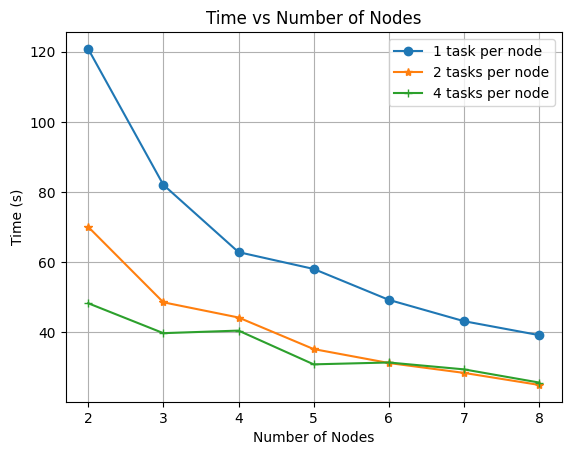

In [40]:
# fixed the size of the matrix to 10000, plot how the times changes with the number of nodes
size = 10000
data_time = data[(data['size'] == size) & (data['task_per_node'] == 1)]
data_time2 = data[(data['size'] == size) & (data['task_per_node'] == 2)]
data_time4 = data[(data['size'] == size) & (data['task_per_node'] == 4)]


plt.plot(data_time['nodes'], data_time['time'], marker='o')
plt.plot(data_time2['nodes'], data_time2['time'], marker='*')
plt.plot(data_time4['nodes'], data_time4['time'], marker='+')

# add more line per task per node
plt.xlabel('Number of Nodes')
plt.ylabel('Time (s)')
plt.legend(['1 task per node', '2 tasks per node', '4 tasks per node'])
plt.title('Time vs Number of Nodes')
plt.grid()

In [42]:
file_path = './results/remote/speedup_final.csv'
data = pd.read_csv(file_path)
data 

,method,size,#w,on-demand,time,speedup,efficiency
0,seq,516,1,0,0.028053,1.00,1.00
1,frm,516,1,1,0.031172,0.89,0.89
2,par,516,1,1,0.028764,0.97,0.97
3,prT,516,1,1,0.029773,0.94,0.94
4,frm,516,2,1,0.029235,0.95,0.47
...,...,...,...,...,...,...,...
149,par,8192,16,1,57.420911,2.05,0.12
150,prT,8192,16,1,58.320609,2.02,0.12
151,frm,8192,32,1,61.221815,1.93,0.06
152,par,8192,32,1,48.973009,2.41,0.07


In [43]:
seq = data[data['method'] == 'seq']
frm = data[data['method'] == 'frm']
par = data[data['method'] == 'par']
prT = data[data['method'] == 'prT']


In [66]:
print(frm)

    method  size  #w  on-demand        time  speedup  efficiency
1      frm   516   1          1    0.031172     0.89        0.89
4      frm   516   2          1    0.029235     0.95        0.47
7      frm   516   4          1    0.024736     1.13        0.28
10     frm   516   6          1    0.022002     1.27        0.21
13     frm   516   8          1    0.019540     1.43        0.17
16     frm   516  16          1    0.029865     0.93        0.05
19     frm   516  32          1    0.123825     0.22        0.00
23     frm  1024   1          1    0.237084     0.95        0.95
26     frm  1024   2          1    0.218072     1.04        0.52
29     frm  1024   4          1    0.157826     1.43        0.35
32     frm  1024   6          1    0.125100     1.81        0.30
35     frm  1024   8          1    0.103722     2.18        0.27
38     frm  1024  16          1    0.115936     1.95        0.12
41     frm  1024  32          1    0.399412     0.56        0.01
45     frm  2048   1     

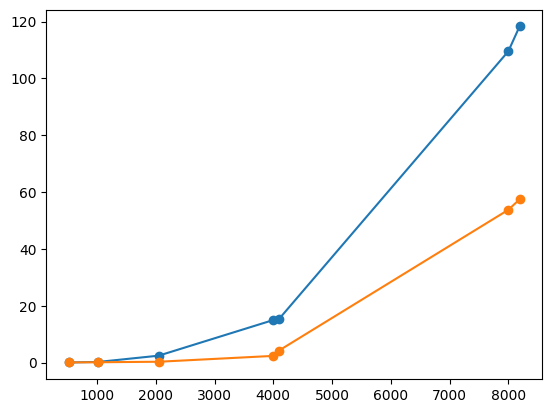

In [50]:
plt.plot(seq['size'], seq['time'], marker='o')
plt.plot(par[par['#w'] == 16]['size'], par[par['#w'] == 16]['time'], marker='o')

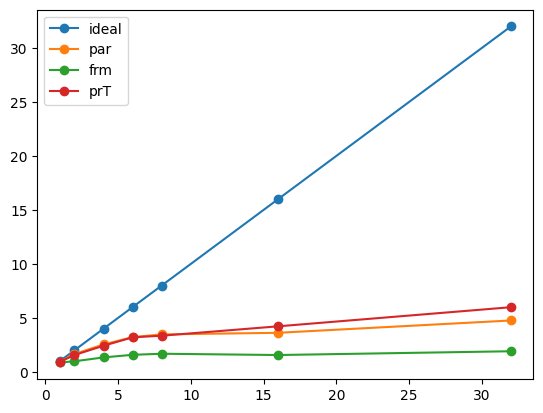

In [64]:
size = 4096
plt.plot(par[par['size'] == size]['#w'], par[par['size'] == size]['#w'], marker='o')
plt.plot(par[par['size'] == size]['#w'], par[par['size'] == size]['speedup'], marker='o')
plt.plot(frm[frm['size'] == size]['#w'], frm[frm['size'] == size]['speedup'], marker='o')
plt.plot(prT[prT['size'] == size]['#w'], prT[prT['size'] == size]['speedup'], marker='o')
plt.legend(['ideal', 'par', 'frm', 'prT'])

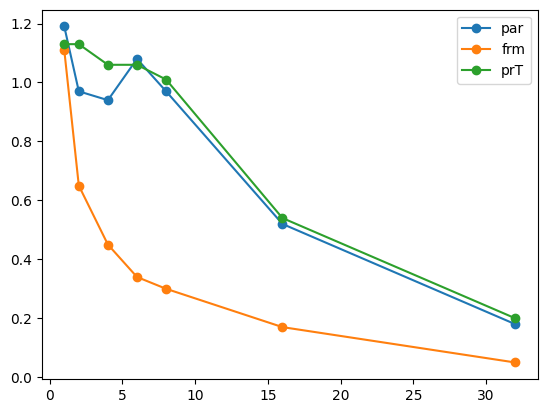

In [63]:
size = 2048
plt.plot(par[par['size'] == size]['#w'], par[par['size'] == size]['efficiency'], marker='o')
plt.plot(frm[frm['size'] == size]['#w'], frm[frm['size'] == size]['efficiency'], marker='o')
plt.plot(prT[prT['size'] == size]['#w'], prT[prT['size'] == size]['efficiency'], marker='o')
plt.legend(['par', 'frm', 'prT'])

In [71]:
par['scalability'] = par.groupby('size')['time'].transform(lambda x: x.iloc[0] / x)
prT['scalability'] = prT.groupby('size')['time'].transform(lambda x: x.iloc[0] / x)
frm['scalability'] = frm.groupby('size')['time'].transform(lambda x: x.iloc[0] / x)

/tmp/ipykernel_28899/903488012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  par['scalability'] = par.groupby('size')['time'].transform(lambda x: x.iloc[0] / x)
/tmp/ipykernel_28899/903488012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prT['scalability'] = prT.groupby('size')['time'].transform(lambda x: x.iloc[0] / x)
/tmp/ipykernel_28899/903488012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [74]:
par

,method,size,#w,on-demand,time,speedup,efficiency,scalability
2,par,516,1,1,0.028764,0.97,0.97,1.000000
5,par,516,2,1,0.026470,1.05,0.52,1.086664
8,par,516,4,1,0.021827,1.28,0.32,1.317817
11,par,516,6,1,0.022144,1.26,0.21,1.298952
14,par,516,8,1,0.029239,0.95,0.11,0.983755
17,par,516,16,1,0.046393,0.60,0.03,0.620007
20,par,516,32,1,0.088214,0.31,0.00,0.326071
24,par,1024,1,1,0.222991,1.01,1.01,1.000000
27,par,1024,2,1,0.132946,1.70,0.85,1.677305
30,par,1024,4,1,0.082117,2.76,0.69,2.715528


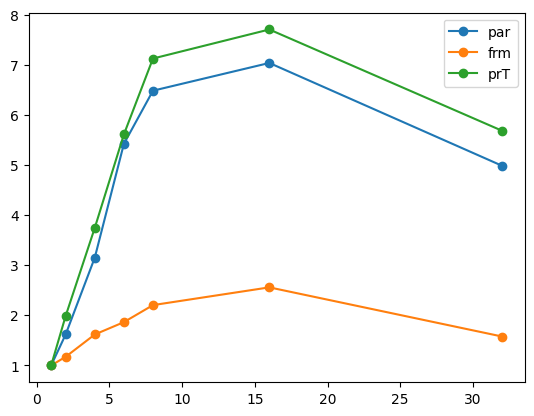

In [76]:
# plot scalability
size = 2048
plt.plot(par[par['size'] == size]['#w'], par[par['size'] == size]['scalability'], marker='o')
plt.plot(frm[frm['size'] == size]['#w'], frm[frm['size'] == size]['scalability'], marker='o')
plt.plot(prT[prT['size'] == size]['#w'], prT[prT['size'] == size]['scalability'], marker='o')
plt.legend(['par', 'frm', 'prT'])


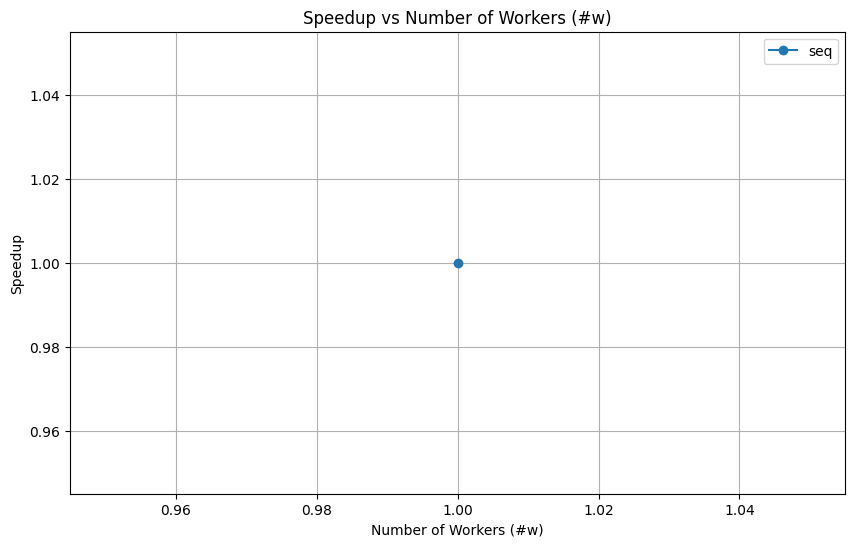

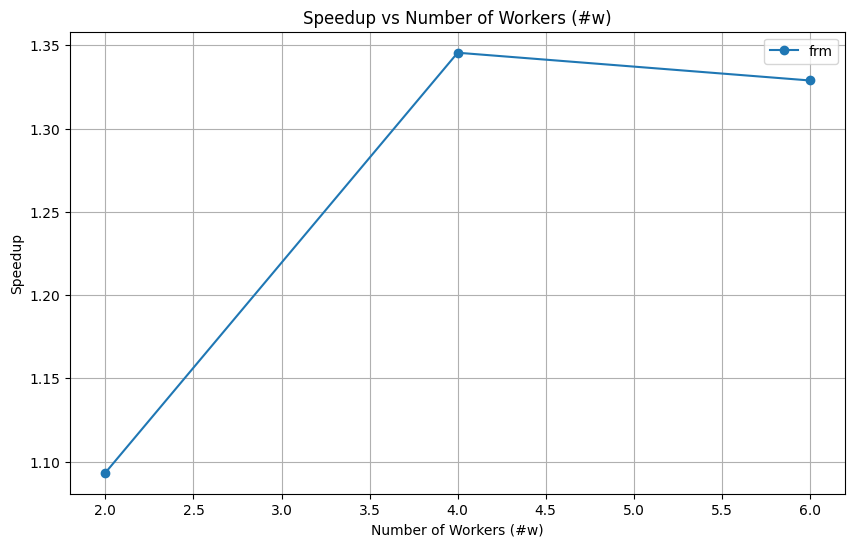

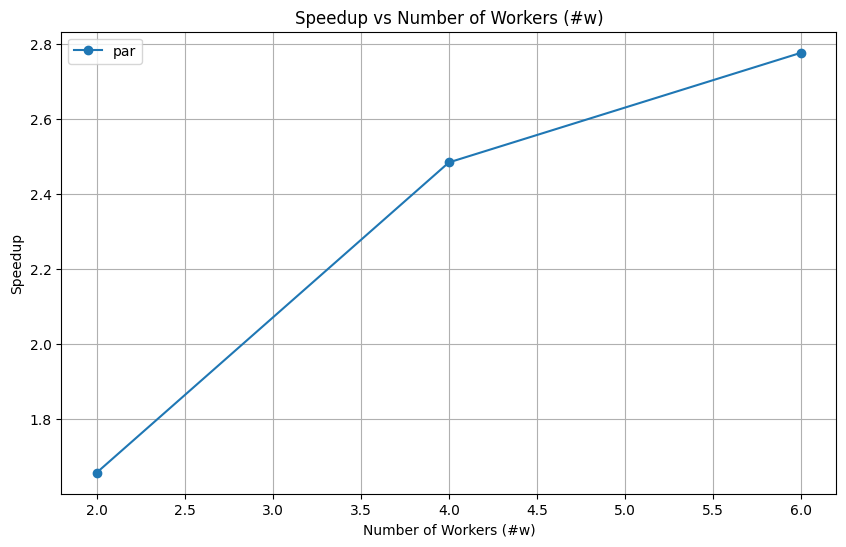

In [14]:
#"method,size,#w,on-demand,time,speedup,efficiency"
# for each method, plot the speedup vs #w, if more than one value is present for the same #w, plot the average
for method in data['method'].unique():
    plt.figure(figsize=(10, 6))
    subset = data[data['method'] == method]
    subset = subset.groupby('#w').agg({'speedup': 'mean'}).reset_index()
    plt.plot(subset['#w'], subset['speedup'], marker='o', label=method)
    plt.title(f'Speedup vs Number of Workers (#w)')
    plt.xlabel('Number of Workers (#w)')
    plt.ylabel('Speedup')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [15]:
# for each method, plot the efficiency vs #w, if more than one value is present for the same #w, plot the average
for method in data['method'].unique():
    plt.figure(figsize=(10, 6))
    subset = data[data['method'] == method]
    subset = subset.groupby('#w').agg({'efficiency': 'mean'}).reset_index()
    plt.plot(subset['#w'], subset['efficiency'], marker='o', label=method)
    plt.title(f'Efficiency vs Number of Workers (#w)')
    plt.xlabel('Number of Workers (#w)')
    plt.ylabel('Efficiency')
    plt.legend()
    plt.grid(True)
    plt.show()

TypeError: agg function failed [how->mean,dtype->object]

<Figure size 1000x600 with 0 Axes>